In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import time
import json
from nltk import ngrams 
from collections import Counter

from scripts import utils
from scripts import documents as docs
from scripts import comparisons 
from scripts import comparisonsmachine as machine

data_folder = "data"
article_files = ["articles2019-06-01_" + str(i) + "-" + str(i + 5000) + ".csv" for i in range(0, 100000, 5000)]
article_files.append("articles2019-06-01_100000-100755.csv")
# article_df = [utils.readArticles(os.path.join(data_folder, file)) for file in article_files]
# article_df = pd.concat(article_df)

article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20180715"))
article_df = article_df.reset_index(drop = True)
event_names = np.unique(article_df["event"].dropna())

# events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
event_path = os.path.join(data_folder, "eventDict2018-07-15.json")
with open(event_path, encoding = "utf8") as json_file:
    events = json.load(json_file)
print(events.keys())
article_df.head(3)

dict_keys(['singletons', 'incompleteFingerprints', 'algoGroups', 'events', 'wordDict', 'entityDict'])


,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc,paywall
0,0,wsbtv.com,2018-07-16T01:02:26-04:00,True,https://www.wsbtv.com/news/local/cobb-county/p...,"Police: Missing teen with autism found, reunit...","Police: Missing teen with autism found, reunit...","{'wordCounts': {'1533': 10, '367': 3, '2619': ...",NaN,None,0.0
1,1,wn.com,2018-07-16T04:51:37-04:00,False,https://wn.com/Apostolic_Constitutions,Apostolic s,Apostolic Constitutions ### back to playlist #...,"{'wordCounts': {'147633': 5, '5029': 6, '546':...",NaN,None,0.0
2,2,lufkindailynews.com,2018-07-15T22:48:17-04:00,False,http://lufkindailynews.com/news/sports/article...,No refuge from politics but France victory a f...,No refuge from politics but France victory a f...,"{'wordCounts': {'2782': 6, '534': 7, '5473': 1...",0.0,None,0.0


In [2]:
N = len(article_df)
N_top50 = np.sum(1 - np.isnan(article_df["event"]))
print("Number of singletons: %d" % len(events['singletons']))
print("Number of articles clustered into top 50 events: %d/%d (.%d)" % (N_top50, N, round(N_top50/N, 2) * 100))
N_clustered = N - len(events['singletons'])
print("Number of non-singletons clustered into top 50 events: %d/%d (.%d)" % (N_top50, N_clustered, round(N_top50/N_clustered, 2) * 100))

Number of singletons: 7959
Number of articles clustered into top 50 events: 78770/123195 (.64)
Number of non-singletons clustered into top 50 events: 78770/115236 (.68)


Text(0.5, 1.0, 'Number of characters per sentence in 500 sample articles')

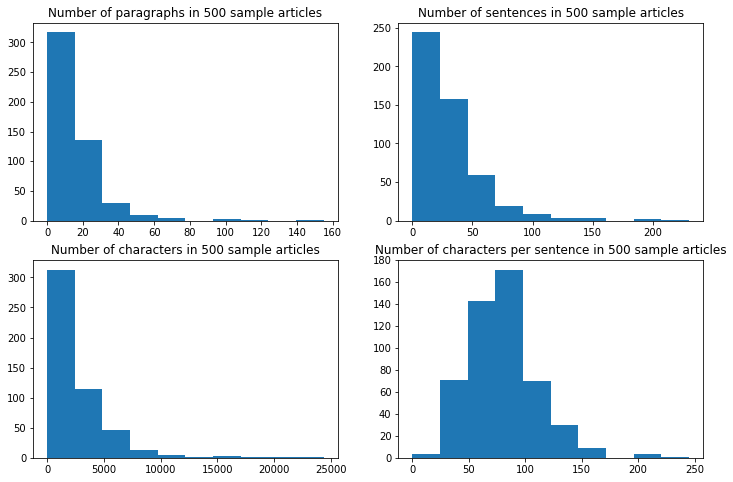

In [3]:
dd = comparisons.DuplicationDetection()
n = 500
sample = random.sample(list(article_df["id"]), n)
article_dict = dd.dict_by_ids(article_df, sample, para_sep = "###")

n_paras = [len(np.unique(article_dict[id].sent_para_map)) for id in article_dict.keys()]
n_sentences = [len(article_dict[id].get_sentences()) for id in article_dict.keys()]
n_chars = [len(str(article_dict[id])) for id in article_dict.keys()]

plt.subplots(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.hist(n_paras)
plt.title("Number of paragraphs in %d sample articles" % n)

plt.subplot(2, 2, 2)
plt.hist(n_sentences)
plt.title("Number of sentences in %d sample articles" % n)

plt.subplot(2, 2, 3)
plt.hist(n_chars)
plt.title("Number of characters in %d sample articles" % n)

plt.subplot(2, 2, 4)
plt.hist([n_chars[i]/max(n_sentences[i], 1) for i in range(len(n_chars))])
plt.title("Number of characters per sentence in %d sample articles" % n)

Text(0.5, 1.0, 'Number of sentences per paragraph in 500 sample articles')

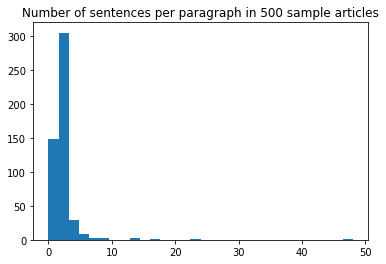

In [4]:
plt.hist([n_sentences[i]/max(n_paras[i], 1) for i in range(len(n_chars))], bins = 30)
plt.title("Number of sentences per paragraph in %d sample articles" % n)

(array([84., 73., 62., 45., 49., 32., 26., 20., 18., 19.,  8., 14., 10.,
         9.,  6.,  1.,  1.,  3.,  7.,  1.,  1.,  1.,  2.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0.  ,   487.36,   974.72,  1462.08,  1949.44,  2436.8 ,
         2924.16,  3411.52,  3898.88,  4386.24,  4873.6 ,  5360.96,
         5848.32,  6335.68,  6823.04,  7310.4 ,  7797.76,  8285.12,
         8772.48,  9259.84,  9747.2 , 10234.56, 10721.92, 11209.28,
        11696.64, 12184.  , 12671.36, 13158.72, 13646.08, 14133.44,
        14620.8 , 15108.16, 15595.52, 16082.88, 16570.24, 17057.6 ,
        17544.96, 18032.32, 18519.68, 19007.04, 19494.4 , 19981.76,
        20469.12, 20956.48, 21443.84, 21931.2 , 22418.56, 22905.92,
        23393.28, 23880.64, 24368.  ]),
 <a list of 50 Patch objects>)

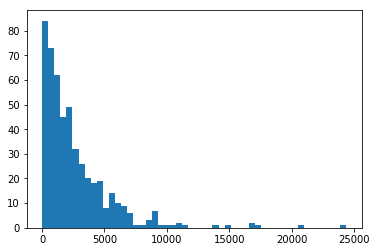

In [5]:
plt.hist(n_chars, bins = 50)

In [6]:
bad_prop = [np.mean(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in np.unique(article_df["event"].dropna())]

[]


Text(0.5, 1.0, "Number of 'good' and 'bad' articles per Event cluster")

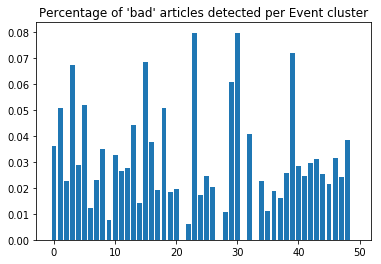

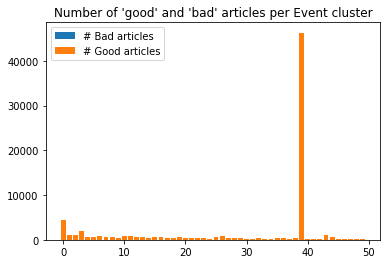

In [7]:
bad_prop = [np.mean(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in event_names]
plt.bar(event_names, bad_prop)
plt.title("Percentage of 'bad' articles detected per Event cluster")
bad_events = event_names[np.where(np.array(bad_prop) > 0.25)]
print([(i, bad_prop[np.where(event_names == i)[0][0]]) for i in bad_events])

bad_n = [np.sum(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in event_names]
good_n = [np.sum(article_df.loc[article_df["event"] == i, "paywall"] == 0) for i in event_names]
plt.figure()
plt.bar(event_names, bad_n)
plt.bar(event_names, good_n)
plt.legend(["# Bad articles", "# Good articles"])
plt.title("Number of 'good' and 'bad' articles per Event cluster")

In [8]:
np.where(np.array(good_n) > 10000)
bad_prop[39], good_n[39]

(0.0721674284339668, 46284)

In [9]:
start = time.time()
for event in bad_events:
    event_df = article_df.loc[article_df["event"] == event, ]
    bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
    print("\n###\nProcessing event %d with %d/%d bad articles, %.2fs elapsed\n###\n" % (event, len(bad_articles), len(event_df), time.time() - start))
    bad_dict = dd.dict_by_ids(article_df, random.sample(bad_articles, min(50, len(bad_articles))))
    sim_mat = dd.similarity_mat(bad_dict)
    plt.figure()
    plt.title("Groups of 'bad' articles (%.2f of cluster) in event %d sample (Unique = %.2f)" % (len(bad_articles)/len(event_df), event, dd.prop_unique_clusters()))
    dd.cluster_articles(sim_mat, plot = True)
    print("\nEvent %d unique bad article examples:" % (event))
    clusters = dd.get_cluster_assignments()
    for i in np.unique(clusters):
        print("\nEX%d" % (i), event_df.loc[event_df["id"] == bad_articles[np.where(clusters == i)[0][0]], "text"].iloc[0])


###
Processing event 0 with 164/4551 bad articles, 0.01s elapsed
###

0 of 50 rows completed, 0.00m elapsed

Event 0 unique bad article examples:

EX0
 Jul. 15, 2018 12:54 PM EDT ### France wins its 2nd World Cup title, beats Croatia 4-2 in final ### BC-APNewsAlert ### MOSCOW (AP) — France wins its 2nd World Cup title, beats Croatia 4-2 in final. ### Topics ### Jul. 15, 2018 2:10 PM EDT ### ©2018 The Associated Press. All rights reserved. ### Terms under which this site is provided. Learn more about our Privacy Policy .

EX1
 Don't have an account? Sign Up Today ### My Account ### Young, joyful France beats Croatia 4-2 to win 2nd World Cup ### Petr David Josek ### Save ### Russian President Vladimir Putin touches the World Cup trophy as FIFA President Gianni Infantino stands beside him, at the end of the final match between France and Croatia at the 2018 soccer World Cup in the Luzhniki Stadium in Moscow, Russia, Sunday, July 15, 2018. France won 4-2. (AP Photo/Petr David Josek) ### P

 These are external links and will open in a new window ### Close share panel ### Video duration 1:58 ### Analysis: How France won the World Cup Jump to media player Match of the Day pundits highlight the key attributes and tactics that helped France win the World Cup after they beat Croatia 4-2 in the final. ### 15 Jul

EX21
 Email ### It has been an exciting ride through the 2018 World Cup in Russia, and it culminates this weekend with a meeting of France and Croatia in the final. ### Here are the best bets for France-Croatia, along with a look at Saturday's third-place match between Belgium and England. ### Note: All odds are via Westgate Las Vegas SuperBook as of Friday unless otherwise noted. ### Final: France (-115) vs. Croatia (+400) ### Sunday at 11 a.m. ET ### Insider

EX22
 share ### more_vert ### France's forward Kylian Mbappe (L) jumps over Belgium's midfielder Kevin De Bruyne during the Russia 2018 World Cup semi-final football match between France and Belgium at the Saint

 back to playlist ### World Cup (men's golf) ### The ISPS Handa World Cup of Golf is a men's golf tournament contested by teams of two representing their country. Only one team is allowed from each country.  The equivalent event for women was the Women's World Cup of Golf , played from 2005 to 2008.  It began in 1953 as the Canada Cup and changed its named to the World Cup in 1967.  ### The tournament was incorporated into the World Golf Championships series from 2000 to 2006. 

EX38
 (85714) ### Today ### Generally cloudy. A stray shower or thunderstorm is possible. High 91F. Winds NW at 5 to 10 mph.. ### Tonight ### Mostly cloudy skies this evening will become partly cloudy after midnight. A stray shower or thunderstorm is possible. Low 76F. Winds SSE at 5 to 10 mph. ### Updated: July 15, 2018 @ 12:58 pm

EX39
 Jul. 15, 2018 | 09:47 PM ### Russia to extend soccer fans' visa-free regime to end-2018 ### Croatia fans follow the final match between France and Croatia at the 2018 soccer W

 Djokovic overcame a determined Nadal in five hours and 15 minutes ### Posted July 15, 2018 09:35:42 ### Serbia's Novak Djokovic reached his fifth Wimbledon final as he resisted everything great rival Rafael Nadal could throw at him to win 6-4 3-6 7-6(9) 3-6 10-8 in a two-day classic.

EX18
 Today at Wimbledon ### This programme will be available shortly after broadcast ### Day 13 ### Today at Wimbledon , 2018 ### Clare Balding presents the best of the action from the final day of the 2018 Championships at Wimbledon, in which the men's singles final takes centre stage. ### Clare is joined by guests to look back on the key moments and major talking points from what was sure to be a memorable day at the world-famous All England Club. ### Show more / Show less

EX19
 Sue Barker presents live coverage of the 2018 Wimbledon men's singles final. ### Release date:

EX20
 Wimbledon final live stream: Novak Djokovic vs Kevin Anderson TV listings & start time ### Posted, 2018-07-15 ### developed

 (24010) ### Today ### Scattered thunderstorms early, then cloudy skies after midnight. Low around 70F. Winds W at 5 to 10 mph. Chance of rain 50%.. ### Tonight ### Scattered thunderstorms early, then cloudy skies after midnight. Low around 70F. Winds W at 5 to 10 mph. Chance of rain 50%. ### Updated: July 15, 2018 @ 6:54 pm

EX4
 • ### July 15, 2018 ### Chicago Police released body-worn camera footage showing that a black man killed by an officer had been armed. Harith Augustus' death had provoked violent protests in the city's South Side. (July 15)

EX5
 Violence breaks out in Chicago after fatal police shooting ### Yahoo View • ### July 15, 2018 ### Overnight in Chicago, protesters clashed with police in the streets after a man was killed by an officer on Saturday. NBC’s Ron Mott reports for Sunday TODAY. ### Watch TV shows , movies and more on Yahoo View .  See More ### Check out more stuff on Yahoo View

EX6
 Chicago Police body cam video of shooting of Harith Augustus ### Cat pos

 (85714) ### Today ### Generally cloudy. A stray shower or thunderstorm is possible. High 91F. Winds NW at 5 to 10 mph.. ### Tonight ### Mostly cloudy skies this evening will become partly cloudy after midnight. A stray shower or thunderstorm is possible. Low 76F. Winds SSE at 5 to 10 mph. ### Updated: July 15, 2018 @ 11:58 am

EX7
 DML TV: President Trump has arrived in Helsinki ahead of meeting with Russian President Vladimir Putin ### 10shares ### Get the DML App. CLICK HERE ### DML TV brings you the following must-see video. Watch and CHAT LIVE underneath. ### President @realDonaldTrump has arrived in Helsinki for his meeting with Russian President Vladimir Putin; @johnrobertsFox reports. https://t.co/7GGmIXpsbF pic.twitter.com/yBEOmW73zC ### — Fox News (@FoxNews) July 15, 2018 ### President Donald J. Trump and First Lady Melania Trump emerge from Air Force One at the 11:19 minute mark in the video below. ### LIVE CHAT. Watch more DML TV videos.  Go to the Google Play Store or the 

 Our website uses cookies to improve its performance and enhance your user experience. Through cookies, certain personal data is collected and may be stored temporarily. You can change your cookie settings through your browser. More info: Privacy Policy ### Accept & Close ### Sputnik International ### US President Donald Trump repeatedly raised the idea of invading a neighboring South American country last year, despite the objections of his aides, a new report says.                            ### Last update: 09:49 26.06.2018  ### Yes ### © 2018 Sputnik.  ### Users are obliged abide by national and international laws.   ### In all language versions of the sputniknews.com websites any comments posted can be edited.    ### If the moderators deem it possible to restore the account / unlock access, it will be done.  ### To contact the team of moderators, write to moderator@sputniknews.com ### Log in

EX26
 Save ### A woman and a man show a posters for human rights as they attend a rally a

 Subscribe to discover fast, unlimited access.  Log in or Activate your account. ### Thanks for being a subscriber. ### Sorry, your subscription does not include this content. ### Please call 877-433-5056 to upgrade your subscription. ### You are the owner of this article. ### Don't have an account? Sign Up Today ### My Account ### Keep it Clean. Please avoid obscene, vulgar, lewd, racist or sexually-oriented language. ### PLEASE TURN OFF YOUR CAPS LOCK. ### Don't Threaten. Threats of harming another person will not be tolerated. ### Be Truthful. Don't knowingly lie about anyone or anything. ### Be Nice. No racism, sexism or any sort of -ism that is degrading to another person. ### Be Proactive. Use the 'Report' link on each comment to let us know of abusive posts. ### Share with Us. We'd love to hear eyewitness accounts, the history behind an article.

EX4
 (22801) ### Today ### Partly cloudy with afternoon showers or thunderstorms. High 87F. Winds light and variable. Chance of rain 5

 Police involved shootings in Massachusetts, Missouri leave one officer dead, three injured ### Yahoo View • ### July 15, 2018 ### Officer Mike Chesna of Weymouth, Massachusetts, was killed when responding to a call on Sunday morning, while in Kansas City, a person of interest fired at least 50 shots at officers wounding three. ### Watch TV shows , movies and more on Yahoo View .  See More ### Check out more stuff on Yahoo View

EX8
 March 22, 1953 - July 13, 2018 ### Bridgewater, Massachusetts ### Kane Funeral Home & Cremation Services  ### Your Name: ### *For security purposes, please type the text that appears below. ### Thank You! ### BRIDGEWATER---Complete Obituary to follow. ### Create An Online Memorial For Richard E. Tranmer ### The beautiful and interactive Eternal Tribute tells Richard's life story the way it deserves to be told in words, pictures and video.  

EX9
 Want More?  Sign Up for Our Newsletter! ### FOLLOW US! ### Grimes wins restraining order against caped intruder

  Louis Post-Dispatch ### Reader Rewards membership ### Already a subscriber? Log in or Activate your account. ### You are the owner of this article. ### Don't have an account? Sign Up Today ### My Account ### Save ### Interim Cardinals manager Mike Shildt is sticking with a couple of Mike Matheny lineup staples — Matt Carpenter at leadoff and Marcell Ozuna as the clean-up hitter — on the day after Matheny's firing. ### But Shildt added a twist in his first game as manager: All-Star catcher Yadier Molina will bat second. ### (No advanced metrics were immediately available to support this, but that may be — in terms of pure footspeed — the slowest 1-2 combo at the top of any MLB lineup in 2018.) ### Here's is Shildt's lineup for his fading Cardinals in the 1:15 p.m. Sunday game against the steadily advancing Cincinnati Reds: ### 1. Carpenter 1b

EX8
 Here's what Cardinals players had to say about Matheny's firing ### The clubhouse was somber before Sunday's finale against the Reds. ### 

 Angelique Kerber showed her dominance early in the final ### Updated July 15, 2018 07:17:40 ### Seven-times champion Williams had been bidding to claim a record-equalling 24th Grand Slam crown but made too many errors as Kerber ran out a comfortable winner in the final.

EX7
 (68102) ### Today ### Areas of fog early, becoming mostly sunny this afternoon. High 91F. Winds N at 5 to 10 mph.. ### Tonight ### Mainly clear. Low near 70F. Winds N at 5 to 10 mph. ### Updated: July 15, 2018 @ 6:15 am

EX8
 (54729) ### Today ### Generally cloudy. A stray shower or thunderstorm is possible. High 86F. Winds WSW at 5 to 10 mph.. ### Tonight ### Partly cloudy skies. A stray shower or thunderstorm is possible. Low 61F. Winds NW at 5 to 10 mph. ### Updated: July 15, 2018 @ 10:56 am

EX9
 Dozier's grand slam in 10th gives Twins 11-7 win over Rays ### Posted, 2018-07-16 ### developed with YouTube ### MINNEAPOLIS (AP) — Brian Dozier wrapped up a wild back-and-forth finish with the game-winning grand sla

C:\Users\v-lindo\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Event 10 unique bad article examples:

EX0
 UK's Theresa May: Trump told me to 'sue the EU' over Brexit ###  ### Sunday ### Jul 15, 2018 at 6:00 AM ### LONDON (AP) " British Prime Minister Theresa May says that President Donald Trump advised her to "sue" the European Union in the negotiations over Britain's exit from the bloc. ### Trump told reporters Friday at a joint press conference with May that he had given the British leader a suggestion that she found too "brutal." ### Asked on the BBC's Andrew Marr Show on Sunday what that suggestion was, May said: "He told me I should sue the EU. Not go into negotiation, sue them." ### She added: "What the president also said at that press conference was 'Don't walk away. Don't walk away from the negotiations. Then you're stuck.'" ### Never miss a story ### Choose the plan that's right for you. ### Digital access or digital and print delivery.

EX1
 (62523) ### Today ### Partly to mostly cloudy with a chance of thunderstorms. High 84F. Winds 

0 of 23 rows completed, 0.00m elapsed

Event 11 unique bad article examples:

EX0
 What's next: Trump to meet with Putin ### TODAY ### Willie Geist and Dylan Dreyer wrap up Sunday TODAY with a look at the week ahead, including President Donald Trump set to meet with Russian President Vladimir Putin on Monday in Helsinki, Finland. ### Close

EX1
 Trump arrives in Helsinki ahead of Putin summit ### Yahoo View • ### July 15, 2018 ### President Trump called the European Union a “foe” in an interview with CBS News ahead of his high-stakes meeting with Russian President Vladimir Putin in Helsinki, Finland. ### Watch TV shows , movies and more on Yahoo View .  See More ### Check out more stuff on Yahoo View

EX2
 U.S. President Trump Says He Has 'Low Expectations' for Putin Meeting: CBS News ### By Reuters ### July 15, 2018 ### LONDON — U.S. President Donald Trump said he had low expectations for his meeting with Russian President Vladimir Putin on Monday in Helsinki. ### "I go in with low ex

 Trump Sets Expectations Low for Russia Summit ### news 13 minutes ago USA TODAY ### Now Playing Trump Sets Expectations Low for Russia Summit USA TODAY ### President Donald Trump says that "nothing bad ... maybe some good" will come out of his Monday meeting with Russia's Vladimir Putin. (July 15) ### Close

###
Processing event 12 with 20/722 bad articles, 10.06s elapsed
###

0 of 20 rows completed, 0.00m elapsed

Event 12 unique bad article examples:

EX0
 back to playlist ### Rock and roll ### Rock and roll (often written as rock & roll or rock 'n' roll) is a genre of popular music that originated and evolved in the United States during the late 1940s and early 1950s, from a combination of African-American genres such as blues , boogie woogie , jump blues , jazz , and gospel music , together with Western swing and country music .   For the purpose of differentiation, this article deals with the first definition.      

EX1
 Zakharova Roasts Trump: Who Actually Has 35,000 Troops In 

 Thank you for Reading. ### Please purchase a subscription to continue reading. ### Thank you for reading 10 free articles on Fredericksburg.com.    Please click Sign Up to subscribe, or Login if you are already a member. ### A subscription is required to continue reading. ### Thank you for reading 10 free articles on Fredericksburg.com.   Please click below to Get Started. ### Your current subscription does not provide access to this content. ### T6hank you for reading 10 free articles on Fredericksburg.com.    Please click here to select a subscription, or login if you are already a member.

EX19
 • ### July 13, 2018 ### The Justice Department has announced charges against 12 Russian intelligence officers for hacking offenses during the 2016 presidential election.

###
Processing event 13 with 29/657 bad articles, 10.72s elapsed
###

0 of 29 rows completed, 0.00m elapsed

Event 13 unique bad article examples:

EX0
 MO Lottery | The Kansas City Star ### July 15, 2018 12:58 PM ### JEFF

 Subscribe to discover fast, unlimited access. ### Digital Basic ### ✓ Unlimited access to elkodaily.com and apps ### ✓ No more surveys blocking articles ### Save ### LAS VEGAS (AP) — Police in Las Vegas say they're searching for a man suspected of fatally shooting the mother of his children. ### Las Vegas Metropolitan Police officers responded to a home Saturday after the couple's two young children reportedly discovered the body. ### Police say the two children both are under age 10. ### The name of the woman and suspect weren't immediately released Sunday. ### Get news headlines sent daily to your inbox ### Sign Up!  ### Police say the children's father lived at the home. ### They say there had been no previous calls to that address for domestic disturbances. ### Copyright 2018 The Associated Press. All rights reserved. This material may not be published, broadcast, rewritten or redistributed. ### Love

EX3
 Subscribe to discover fast, unlimited access. ### Digital Basic ### ✓ Unlim

 Israeli Palestinian Clashes 'Continue in Gaza' ### July 14, 2018 ### 27 min ### Despite reports of an earlier truce, both sides are believed to be still exchanging fire. Also: In Nicaragua, dozens of students who took refuge from security forces and pro government militia in a church have been allowed to leave after Roman Catholic clergy intervene, and President Trump's visit to the UK is continuing to cause controversy. ### Stay up-to-date with the latest news, stories and insider events. ### Please enter a valid email address Oops, something went wrong! ### Sign Up

EX3
 Gaza’s children rally against Israeli crimes ### Sun Jul 15, 2018 07:41PM ### Hala Alsafadi ### Press TV, Gaza ### Children in the Gaza Strip have come together to condemn Israeli crimes against Palestinian kids. This, a day after two Palestinian teenagers lost their lives in an Israeli air raid on Gaza City. Halla Alsafadi has more on the story. ### Loading ...

EX4
 Video purports to show Israel airstrikes targeti

0 of 20 rows completed, 0.00m elapsed

Event 18 unique bad article examples:

EX0
 Don't have an account? Sign Up Today ### My Account ### Passenger on motorcycle dies in crash in Box Elder ### 11 hrs ago ### Save ### BOX ELDER, S.D. (AP) — Authorities say a passenger on a motorcycle was killed in a crash in Box Elder. ### The South Dakota Highway Patrol says a woman driving the motorcycle lost control while attempting to turn onto Interstate 90. The vehicle entered the ditch and hit a barbed wire fence. Both the driver and passenger were thrown from the motorcycle. ### The passenger, a 62-year-old man, was pronounced dead at the scene. The driver was transported to a hospital with non-life threatening injuries. ### The patrol says it is considering charges against the driver. ### Love

EX1
  ### All content © Copyright 2000 - 2018 Video Indiana, Inc. and WTHR. All Rights Reserved. 

EX2
 We hope you have enjoyed your complimentary access for the month. ### Already a subscriber? ### Cl

 Subscribe to discover fast, unlimited access.  Log in or Activate your account. ### Thanks for being a subscriber. ### Sorry, your subscription does not include this content. ### Please call 877-680-6397 to upgrade your subscription. ### You are the owner of this article. ### News outlets report the zoo was closed Saturday and would reopen Sunday. ### It was not immediately clear how the animal escaped. An investigation is underway. ### This is not the first time a jaguar has escaped its enclosure at Audubon. In 2001, a 70-pound cub named Mulac got loose for about 10 minutes before he was brought down with a tranquilizer dart. No animals or humans were injured in that escape. ### Copyright 2018 The Associated Press. All rights reserved. This material may not be published, broadcast, rewritten or redistributed. ### Love

###
Processing event 22 with 2/325 bad articles, 16.44s elapsed
###

0 of 2 rows completed, 0.00m elapsed

Event 22 unique bad article examples:

EX0
 Ray Emery died a

 NewsOK Pro ### Customize your news. Try NewsOK Pro!  ### NewsOK: Oklahoma City News, Sports, Weather & Entertainment ### Pussy Riot claims responsibility for four people running onto field during World Cup final ### Published: Sun, July 15, 2018 11:15 AM Updated: Sun, July 15, 2018 11:15 AM ### shares ### MOSCOW (AP) — Pussy Riot claims responsibility for four people running onto field during World Cup final.  Managed 24/7 by these editors:  apne.ws/APSocial Read more ›

EX16
 We hope you have enjoyed your complimentary access for the month. ### Already a subscriber? ### Click on the button below to set up your account or log in if you already have one. ### Want to become a subscriber?  ### Digital-only Access

EX17
 Pussy Riot claims responsibility for four people running onto field during World Cup final ### July 15, 2018 10:22 AM ### MOSCOW (AP) — Pussy Riot claims responsibility for four people running onto field during World Cup final. ### Advertisement ### Updated: July 15, 2018

 Eugene, Ore. – Sunday, July 15, 2018 ### Dispute on Sunday, July 15, 2018 @ 2:45 a.m. PDT ### Police response: 2:46 a.m. PDT ### Incident description: Dispute ### Location: 310 MILL ST, SPRINGFIELD ### Event number: 18167544 ### Choose the plan that's right for you. ### Digital access or digital and print delivery. ### © Copyright 2006-2018 GateHouse Media, LLC. 

EX1
 Published: July 15, 2018 10:53 AM EDT ### Updated: July 15, 2018 1:09 PM EDT ### - Advertisement - ### Partly cloudy, isolated storms for Sunday ### Published: July 15, 2018 10:53 AM EDT ### Updated: July 15, 2018 1:09 PM EDT ### Recommended ### There will be a high of 93 degrees with areas of isolated storms and a partly cloudy sky Sunday, WINK meteorologist Brooke Silverang said. ### View an hourly forecast here .  ### News When It Matters

EX2
 UPDATE: Five people shot on Cowart St. early Sunday morning ### Five people were shot in a downtown Chattanooga parking lot Sunday morning. ### Sunday, July 15th 2018, 6:33 pm

 Jul. 15, 2018 | 04:41 PM (Last updated: July 15, 2018 | 06:49 PM) ### Paris fanzone fills with 90,000 willing ‘Les Bleus’ to World Cup victory ### Share ### Reuters ### you've reached a subscriber-only article. $99 Existing users can login here or register for a new account. ### * ### Comments ### Your feedback is important to us! ### We invite all our readers to share with us their views and comments about this article.   Please note that your email address will NOT appear on the site. 

###
Processing event 30 with 25/314 bad articles, 19.27s elapsed
###

0 of 25 rows completed, 0.00m elapsed

Event 30 unique bad article examples:

EX0
 (52501) ### Today ### Considerable clouds this morning. Some decrease in clouds later in the day. A stray shower or thunderstorm is possible. High 86F. Winds NW at 5 to 10 mph.. ### Tonight ### Partly cloudy skies. A stray shower or thunderstorm is possible. Low near 70F. Winds light and variable. ### Updated: July 15, 2018 @ 9:53 am

EX1
 Save ### F


0 of 5 rows completed, 0.00m elapsed

Event 34 unique bad article examples:

EX0
 Post a Job ### Close ### FILE - In this March 21, 2017 file photo, Haiti's Prime Minister Dr. Jack Guy Lafontant stands on stage during his confirmation ceremony at the National Palace, in Port-au-Prince, Haiti. Lafontant resigned Saturday, July 14, 2018, amid criticism for his failed attempt to increase fuel prices. (AP Photo/Dieu Nalio Chery, File) ### Dieu Nalio Chery ### Haiti to name new prime minister 'as soon as possible' ### Jul 15, 2018

EX1
 Subscribe to discover fast, unlimited access.  Log in or Activate your account. ### Thanks for being a subscriber. ### Sorry, your subscription does not include this content. ### Please call 309-764-4344 to upgrade your subscription. ### You are the owner of this article. ### Win up to $1,000 when you enter the 2018 Destinations Photo Contest! ### Vacation photographs often capture perfect moments in favorite places.  

EX2
 Don't have an account? Sign Up T

 Real Estate for Rent ### MT. AIRY SPRAGUE COURT APTS 1&... ### MT. AIRY SPRAGUE COURT APTS ### 1&2 BR apts. Utils incl except elec. ### 215-842-2500 lve msg for rentals! ### Ref# 0003363988-01 ### Highland Motel ### $60 ### Motel has 34 rooms and 3 fully furnished apartments.  Property is roughly 15 minutes away from Philadelphia international airport. ### Major interstate junction less than 2 miles away. ### Property can be seen from interstate 95 southbound in between exits 4 and 3.

EX1
 World Cup fans: Greatest football festival comes to its end, we will miss you! ### Added by Truth Broadcast Network on July 14, 2018 ### For many of the fans that visited Russia, win or lose, it’s been a trip they’ll never forget. ### Check out http://rt.com ### Subscribe to RT! http://www.youtube.com/subscription_center? RT is the first news channel to break the 1 billion YouTube views benchmark. ### Category:

EX2
 FOX News Videos • ### July 13, 2018 ### Republican congressman says all Americans 

 Enter email to receive password reset link ### Submit ### Page 1 Next ### Maati Monjib is a historian, journalist, and human rights activist in Morocco. He teaches at Mohammed V University in Rabat. ### 07.15.2018 ### Maati Monjib ### Morocco saw only modest change during the Arab Spring. But a series of pro-democracy movements has shaken its repressive regime. ### Tags ### Search Icon ### Want to explore the entire Jacobin archive? ### Print and digital subscribers can delve into our archive of almost 5,000 articles. Digital subscriptions start at just $1.60 a month.

EX6
 Phylis Jean Foster ### August 20, 1942 - July 13, 2018 ### KOONTZ LAKE - Phylis Jean Fost, 75, died July 13, 2018. A memorial gathering will be Thursday from 12:00 pm to 1:30 p.m. CDT at Rannells Funeral Home, Koontz Lake. Memorials to the Starke County Humane Society. For more information go to Rannells Funeral Home website. ### Published in South Bend Tribune on July 15, 2018 ### Read More

EX7
 Not free money ##

 10-Day DL ### Erasmo Ramirez (lat) threw a bullpen session on Wednesday. ### Ramirez has begun ramping things up as he tries to recover from his right teres muscle strain. He'll likely begin a rehab assignment shortly, and then could be ready to rejoin the Mariners's pitching staff by the end of July. The Seattle rotation appears to be full, so expect Ramirez to work out of the bullpen when he does come back. ### Jul 4

EX26
 Subscribe to discover fast, unlimited access. ### Digital Basic ### ✓ Unlimited access to poststar.com and apps ### ✓ No more surveys blocking articles ### Save ### ASHVILLE, N.Y. (AP) — Authorities are looking for a missing boater on New York's Chautauqua Lake. ### The Chautauqua (shah-TAW'-kwuh) County Sheriff's Office says crews resumed searching Sunday morning for the man, who vanished Saturday. The search is centered near the communities of Ashville and Lakewood in the southern part of the lake in western New York. ### Authorities got word of the boater's di

 BLOTTER: ‘Get off me’: Man admits to shoving his girlfriend ###  ### Jul 15, 2018 at 6:00 AM ### FREEPORT — A 30-year-old man was arrested for battery after shoving his girlfriend. ### A Walton County sheriff’s deputy was sent to check out a report of a domestic battery. He contacted the man, who admitted to shoving his girlfriend during a fight. ### Four witnesses at the home told the deputy they heard the fight and heard the woman yell, “Get off of me.” The woman told the deputy there was a fight, but refused to give any details. ### Since the man admitted to shoving the woman, he was arrested. ### Never miss a story ### Choose the plan that's right for you. ### Digital access or digital and print delivery.

EX39
 Subscribe to discover fast, unlimited access. ### Digital Basic ### ✓ Unlimited access to poststar.com and apps ### ✓ No more surveys blocking articles ### Save ### GLENS FALLS — Henry W. Ettinger, 88, a resident of Glens Falls, passed away unexpectedly on Thursday, July 1

 Man arrested over paraglider protest at Donald Trump's Turnberry resort in Scotland ### 10:39 ### Thai cave rescue news: ALL 12 boys and football coach pictured together for first time since rescue as they pay tribute to ex-Navy Seal Saman Kunan who died ### 10:30 ### Thailand cave rescue news: Hero Brit diver reveals how he lost guide rope underwater for four terrifying minutes while guiding boy to safety ### 10:01

EX1
 Media playback is unsupported on your device ### Video ### Paraglider interrupts Trump's resort visit in Scotland ### A protester in a paraglider interrupted Donald Trump's visit to his Ayrshire hotel and resort in Scotland on Friday evening. ### The paraglider had "Greenpeace" written across the canopy and flew a banner which read 'Trump: well below par'. ### 14 Jul 2018 ### These are external links and will open in a new window ### Close share panel

EX2
 Man Arrested over Paraglider Protest at Trump Resort ### News Headlines and Videos | Comments | Print Friendly 

 Report: Syria blames Israel for strikes in north | News & Observer ### Report: Syria blames Israel for strikes in north ### The Associated Press ### July 15, 2018 04:40 PM ### BEIRUT ### Syria's state news agency is reporting that Israeli missiles have hit a Syrian military base in the country's north, inflicting material damage. ### The SANA said the strikes late Sunday hit north of an air base in Aleppo province. The strikes come only days after Israel said it has targeted three Syrian military positions in response to an unmanned drone that entered its airspace from Syria. ### Israel on Thursday targeted positions in the southwestern Quneitra province, near its frontier with Syria. Israel downed the drone a day earlier with a patriot missile. ### There was no immediate comment from Israel on Sunday's report. ### SIGN UP ### Be the first to know. ### No one covers what is happening in our community better than we do. And with a digital subscription, you'll never miss a local story.


 Trump should cancel ultra-private summit with Putin after election meddling indictments: Schumer ### New York Daily News• ### Trump should cancel ultra-private summit with Putin after election meddling indictments: Schumer ### More ### Top Senate Democrat Charles Schumer called on President Trump to cancel his Monday summit with Russian President Vladimir Putin. “President Putin is an adversary who interfered in our elections to help President Trump win,” Schumer said.

EX29
 Don't have an account? Sign Up Today ### My Account ### (57701) ### Today ### Scattered showers and thunderstorms. High 72F. Winds ESE at 5 to 10 mph. Chance of rain 40%.. ### Tonight ### Some clouds. A stray shower or thunderstorm is possible. Low 61F. Winds S at 5 to 10 mph. ### Updated: July 15, 2018 @ 12:11 pm ### Crimea And NATO Loom Large Over Monday's Trump-Putin Summit ### Jul 15, 2018 ### Then let your friends know they should vote for your photos. The contest voting period is July 17-23. ### promotionsp

 Rapper surprises strangers with free tickets to movie in Maine ### A Maine rapper surprised moviegoers with free tickets to a sci-fi satire movie. ### Rory Ferreira, who goes by the stage name Milo, bought all 129 seats to the 4:20 p.m. showing of the movie “Sorry to Bother You” at the Nickelodeon in Portland, Maine, on Saturday. The Portland Press Herald reports employees told patrons they could see a movie for free as they arrived at the theater. ### Instagram

EX1
 Issue: NewDay Funding 2015-2 PLC ### CLASS F ### XS1309634555 ### Pursuant to our appointment as Agent for the above stated issue, please        be advised of the following interest rate determination: ### Date From: 16 July 2018 ### Date To: 15 August 2018 ### Record Date: 10 August 2018 ### Value Date: 15 August 2018 ### Benchmark Rate: 0.57438%

EX2
 Subscribe to discover fast, unlimited access.  Log in or Activate your account. ### Thanks for being a subscriber. ### Sorry, your subscription does not include this cont

<Figure size 432x288 with 0 Axes>

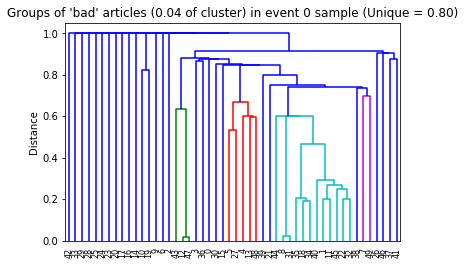

<Figure size 432x288 with 0 Axes>

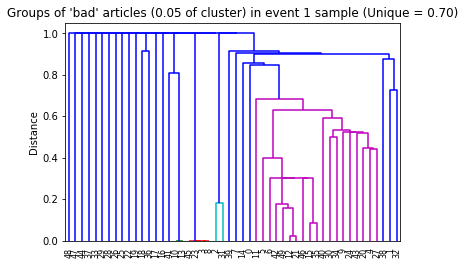

<Figure size 432x288 with 0 Axes>

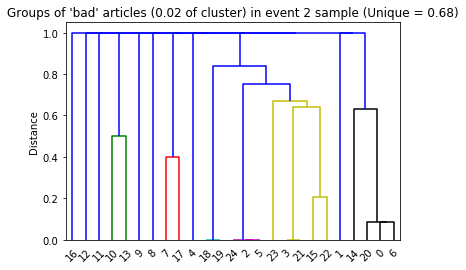

<Figure size 432x288 with 0 Axes>

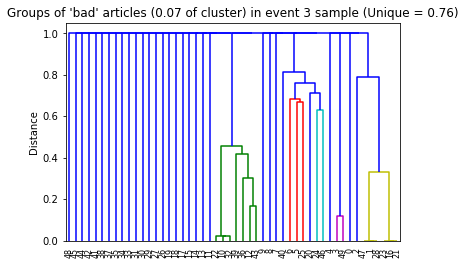

<Figure size 432x288 with 0 Axes>

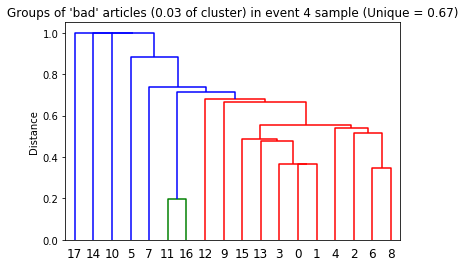

<Figure size 432x288 with 0 Axes>

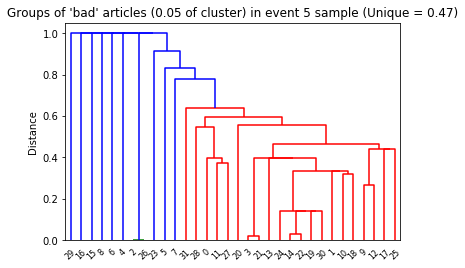

<Figure size 432x288 with 0 Axes>

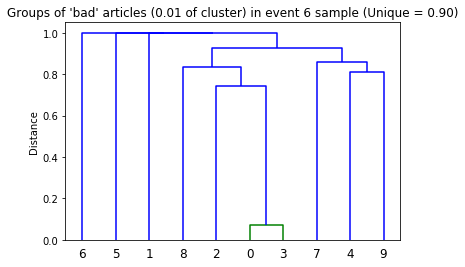

<Figure size 432x288 with 0 Axes>

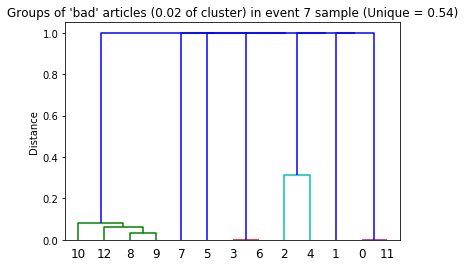

<Figure size 432x288 with 0 Axes>

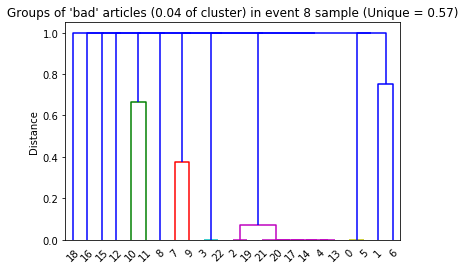

<Figure size 432x288 with 0 Axes>

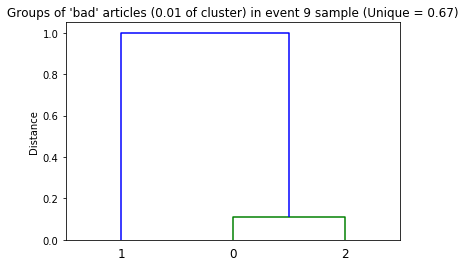

<Figure size 432x288 with 0 Axes>

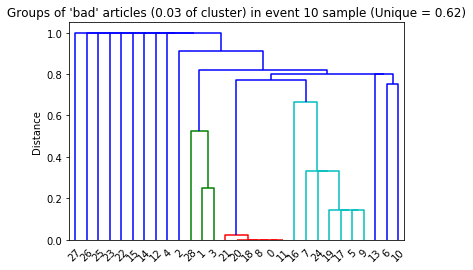

<Figure size 432x288 with 0 Axes>

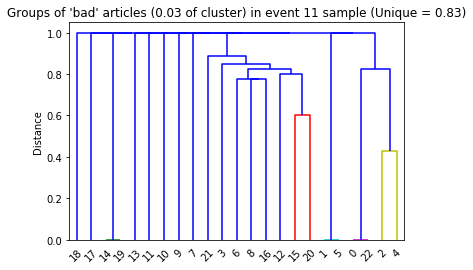

<Figure size 432x288 with 0 Axes>

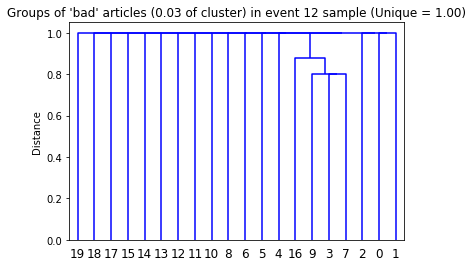

<Figure size 432x288 with 0 Axes>

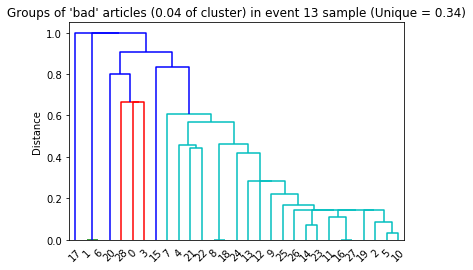

<Figure size 432x288 with 0 Axes>

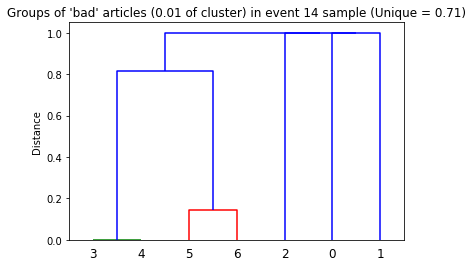

<Figure size 432x288 with 0 Axes>

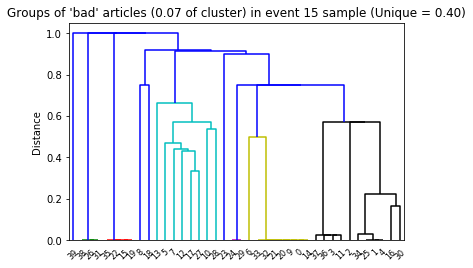

<Figure size 432x288 with 0 Axes>

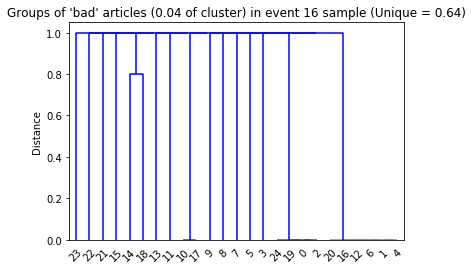

<Figure size 432x288 with 0 Axes>

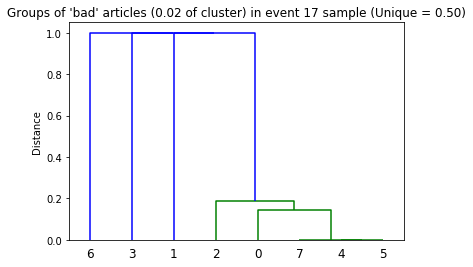

<Figure size 432x288 with 0 Axes>

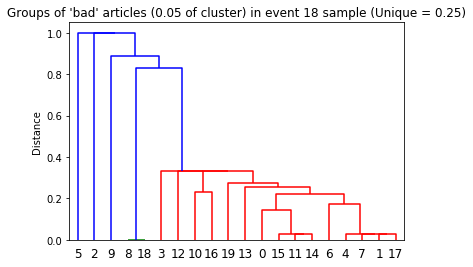

<Figure size 432x288 with 0 Axes>

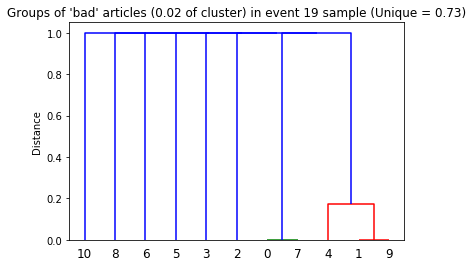

<Figure size 432x288 with 0 Axes>

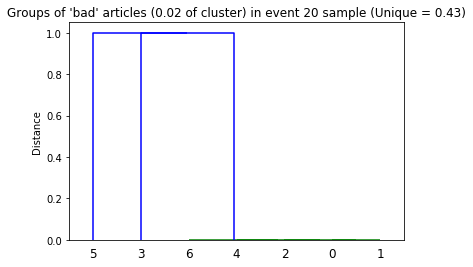

<Figure size 432x288 with 0 Axes>

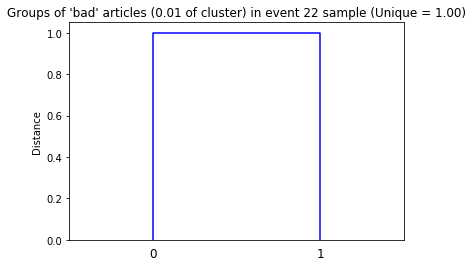

<Figure size 432x288 with 0 Axes>

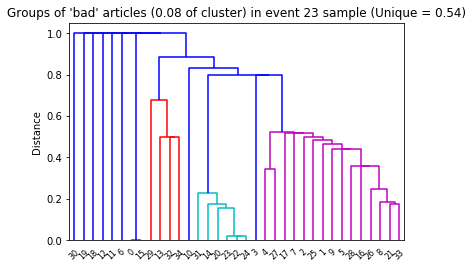

<Figure size 432x288 with 0 Axes>

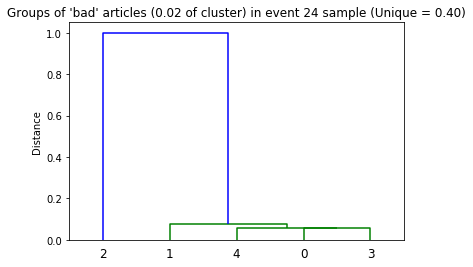

<Figure size 432x288 with 0 Axes>

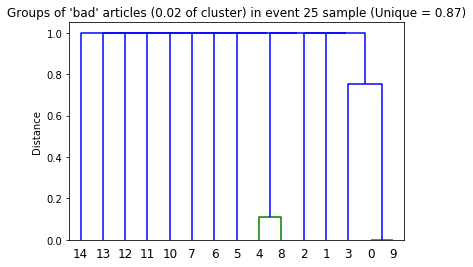

<Figure size 432x288 with 0 Axes>

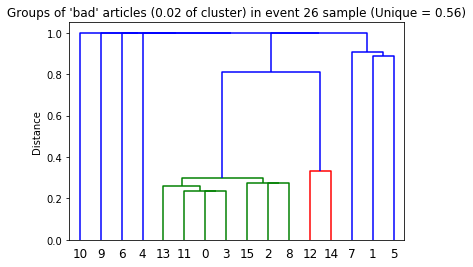

<Figure size 432x288 with 0 Axes>

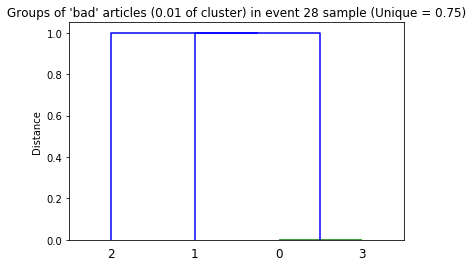

<Figure size 432x288 with 0 Axes>

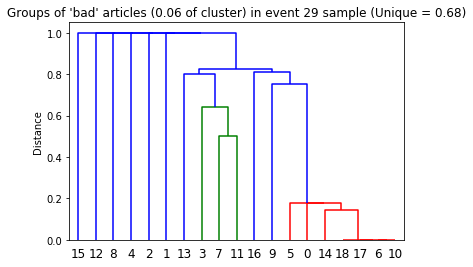

<Figure size 432x288 with 0 Axes>

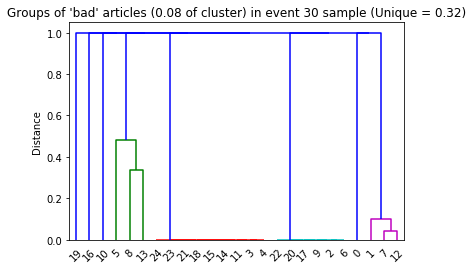

<Figure size 432x288 with 0 Axes>

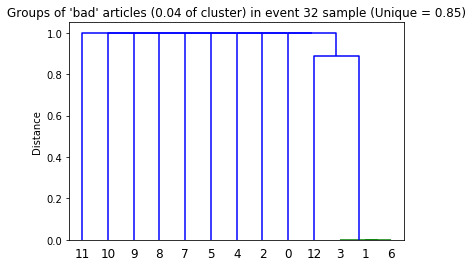

<Figure size 432x288 with 0 Axes>

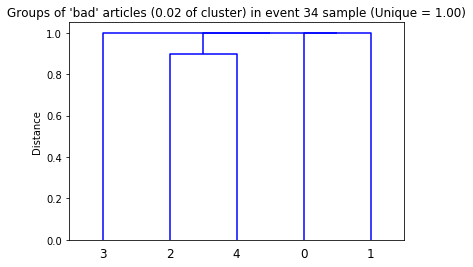

<Figure size 432x288 with 0 Axes>

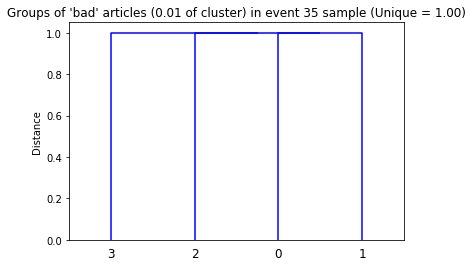

<Figure size 432x288 with 0 Axes>

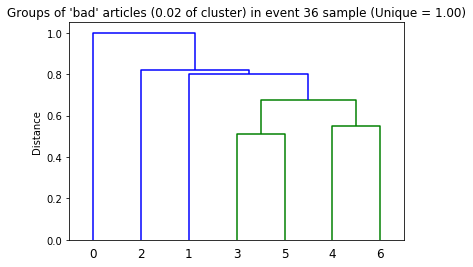

<Figure size 432x288 with 0 Axes>

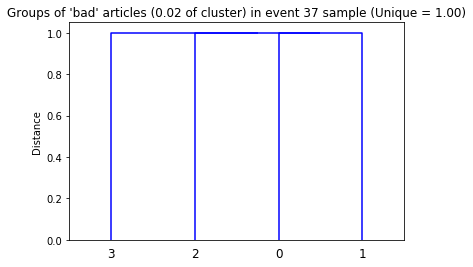

<Figure size 432x288 with 0 Axes>

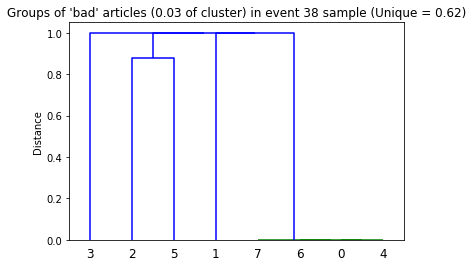

<Figure size 432x288 with 0 Axes>

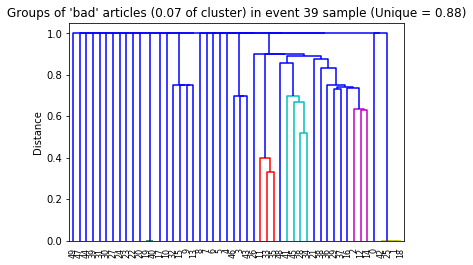

<Figure size 432x288 with 0 Axes>

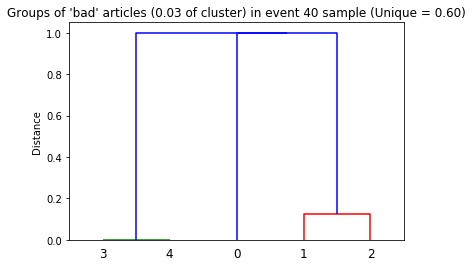

<Figure size 432x288 with 0 Axes>

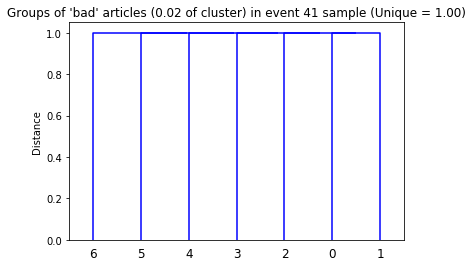

<Figure size 432x288 with 0 Axes>

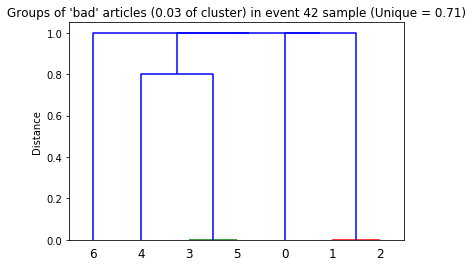

<Figure size 432x288 with 0 Axes>

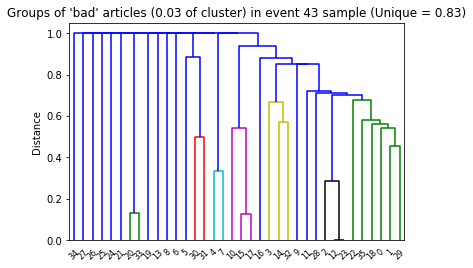

<Figure size 432x288 with 0 Axes>

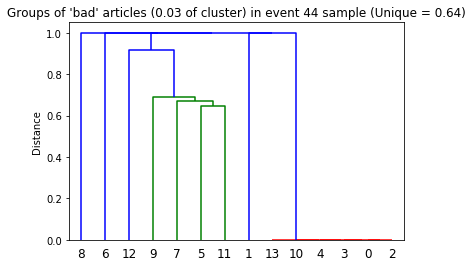

<Figure size 432x288 with 0 Axes>

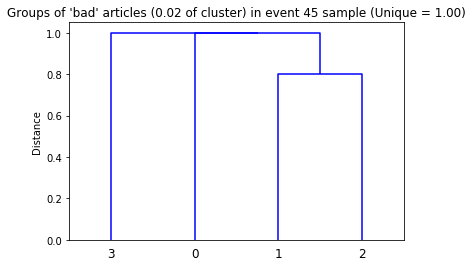

<Figure size 432x288 with 0 Axes>

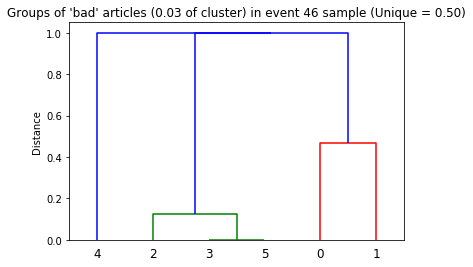

<Figure size 432x288 with 0 Axes>

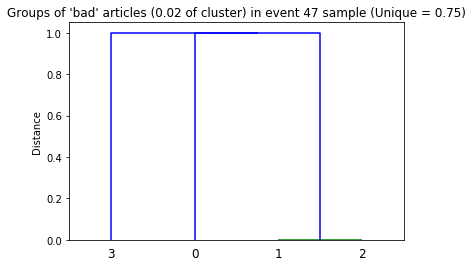

<Figure size 432x288 with 0 Axes>

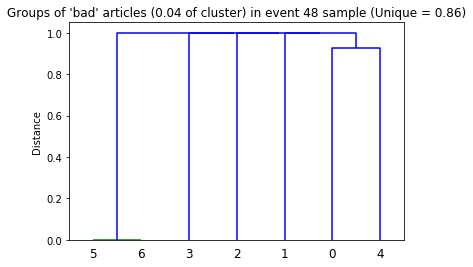

In [10]:
start = time.time()
for event in set(event_names) - set(bad_events):
    event_df = article_df.loc[article_df["event"] == event, ]
    bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
    if len(bad_articles) < 1:
        continue
    print("\n###\nProcessing event %d with %d/%d bad articles, %.2fs elapsed\n###\n" % (event, len(bad_articles), len(event_df), time.time() - start))
    bad_dict = dd.dict_by_ids(article_df, random.sample(bad_articles, min(50, len(bad_articles))))
    sim_mat = dd.similarity_mat(bad_dict)
    plt.figure()
    dd.cluster_articles(sim_mat, plot = True)
    clusters = dd.get_cluster_assignments(sim_mat)
    plt.title("Groups of 'bad' articles (%.2f of cluster) in event %d sample (Unique = %.2f)" % (len(bad_articles)/len(event_df), event, dd.prop_unique_clusters()))
    print("\nEvent %d unique bad article examples:" % (event))
    dict_ids = list(bad_dict.keys())
    for i in np.unique(clusters):
        print("\nEX%d\n" % (i), event_df.loc[event_df["id"] == dict_ids[random.sample(list(np.where(clusters == i)[0]), 1)[0]], "text"].iloc[0])

In [11]:
event = 39
event_df = article_df.loc[article_df["event"] == event, ]
bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
good_articles = list(event_df.loc[event_df["paywall"] == 0, "id"])
#good_dict = dd.dict_by_ids(article_df, good_articles)
sample = random.sample(bad_articles, min(50, len(bad_articles)))
bad_dict = dd.dict_by_ids(article_df, sample)

0 of 50 rows completed, 0.00m elapsed


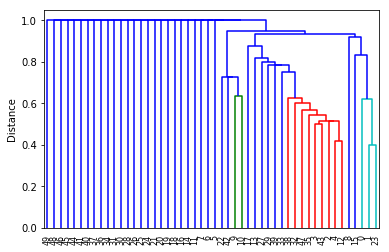

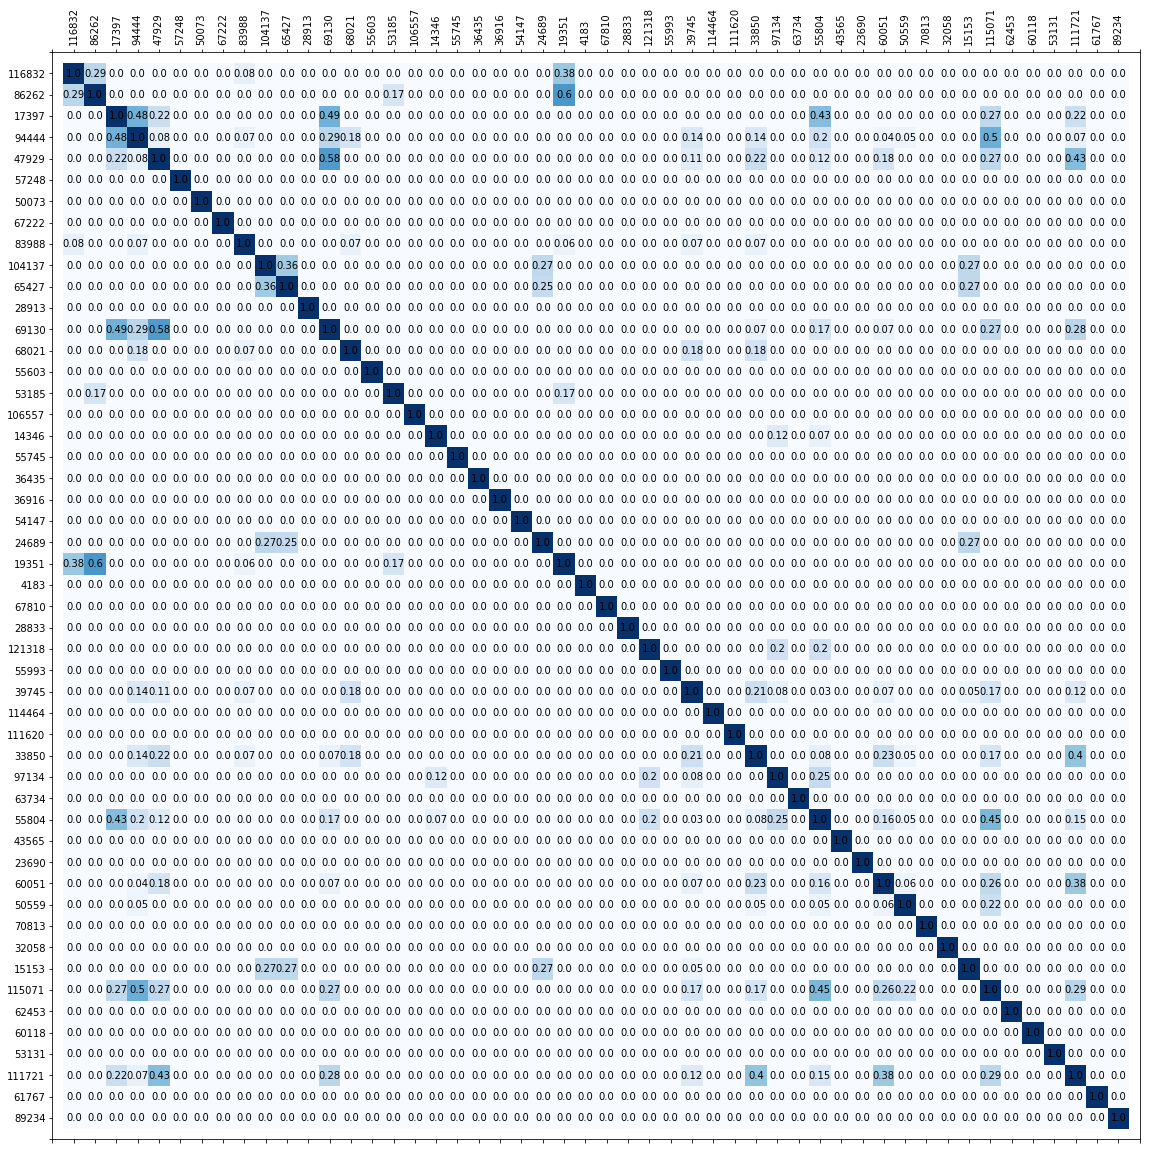

In [12]:
sim_mat = dd.similarity_mat(bad_dict)
dd.cluster_articles(sim_mat, plot = True)
utils.display_mat(sim_mat, xlabs=sample)

In [13]:
id1 = 51592
id2 = 41586
jac_mat = dd.get_jaccard_matrix(bad_dict[id1], bad_dict[id2])
print(bad_dict[id1], "\n")
print(bad_dict[id2])
utils.display_mat(jac_mat)
print(dd.jaccard_score())
dd.print_sentence_matches()

KeyError: 51592

In [ ]:
# For articles not in the top 50 events:
bad_prop = np.mean(article_df.loc[np.isnan(article_df["event"]), "paywall"] > 0)
bad_n = np.sum(article_df.loc[np.isnan(article_df["event"]), "paywall"] > 0) 
good_n = np.sum(article_df.loc[np.isnan(article_df["event"]), "paywall"] == 0)
print("For articles not in the top 50 events, %d/%d bad articles (%.2f)" % (bad_n, bad_n + good_n, bad_n/(bad_n+good_n)))